In [49]:
from __future__ import print_function, division
import numpy as np
import nsfg
import first
import analytic
import thinkstats2
import thinkplot
import scipy

In [52]:
resp = nsfg.ReadFemResp()
# Data frame

In [53]:
timesmar = resp.timesmar
timesmar_dropna = timesmar.dropna()

In [55]:
jintendn = resp.jintendn
jintendn_dropna = jintendn.dropna()

In [7]:
timesmar_mean = timesmar_dropna.mean()
timesmar_mean
# Mean of timesmar

1.387057682985943

In [8]:
timesmar_std = timesmar_dropna.std()
timesmar_std
# Standard deviation of timesmar

4.297113023253083

In [9]:
jintendn_mean = jintendn_dropna.mean()
jintendn_mean
# Mean of jintendn

2.7052556818181817

In [10]:
jintendn_std = jintendn_dropna.std()
jintendn_std
# Standard deviation of jintendn

9.710108051456988

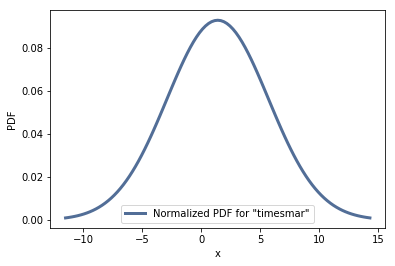

In [20]:
normal_pdf_timesmar = thinkstats2.NormalPdf(timesmar_mean, timesmar_std)
thinkplot.Pdf(normal_pdf_timesmar, label='Normalized PDF for "timesmar"')
thinkplot.Config(xlabel='x', ylabel='Normalized PDF')
# Normalized PDF for "timesmar"

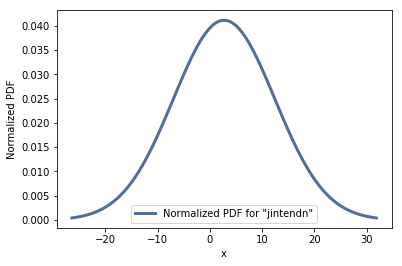

In [21]:
normal_pdf_jintendn = thinkstats2.NormalPdf(jintendn_mean, jintendn_std)
thinkplot.Pdf(normal_pdf_jintendn, label='Normalized PDF for "jintendn"')
thinkplot.Config(xlabel='x', ylabel='Normalized PDF')
# Normalized PDF for "jintendn"

## The mean for timesmar indicates that average number of times respondents have been married equals 1.39. While the mean for jintendn indicates that the average number of kids respondents intend to have equals 2.70.

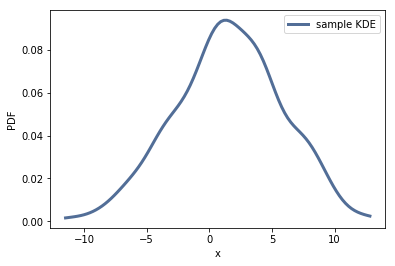

In [90]:
sample = np.random.normal(timesmar_mean, timesmar_std, 500)
sample_pdf = thinkstats2.EstimatedPdf(sample, label='sample')
thinkplot.Pdf(sample_pdf, label='sample timesmar KDE')
thinkplot.Config(xlabel='x', ylabel='PDF')
# Timesmar pdf

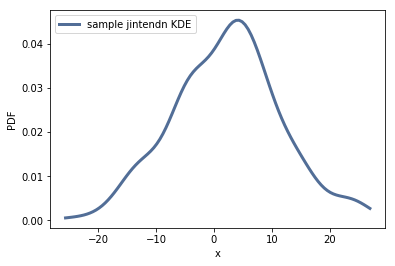

In [91]:
sample = np.random.normal(jintendn_mean, jintendn_std, 500)
sample_pdf = thinkstats2.EstimatedPdf(sample, label='sample')
thinkplot.Pdf(sample_pdf, label='sample jintendn KDE')
thinkplot.Config(xlabel='x', ylabel='PDF')
# jintendn pdf

In [66]:
def RawMoment(xs, k):
    return sum(x**k for x in xs) / len(xs)

In [67]:
def Mean(xs):
    return RawMoment(xs, 1)

In [68]:
def CentralMoment(xs, k):
    mean = RawMoment(xs, 1)
    sum_list = [(x - mean)**k for x in xs]
    return sum(sum_list) / len(sum_list)

In [69]:
def Var(xs):
    return CentralMoment(xs, 2)

In [70]:
def StandardizedMoment(xs, k):
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    return CentralMoment(xs, k) / std**k

In [71]:
def Skewness(xs):
    return StandardizedMoment(xs, 3)

In [72]:
def Median(xs):
    cdf = thinkstats2.Cdf(xs)
    return cdf.Value(0.5)

In [73]:
def PearsonMedianSkewness(xs):
    median = Median(xs)
    mean = RawMoment(xs, 1)
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    gp = 3 * (mean - median) / std
    return gp

In [75]:
Skewness(timesmar_dropna)
# Skewness timesmar

22.219307220678285

In [76]:
Skewness(jintendn_dropna)
# Skewness jintendn

9.686914057933583

In [80]:
PearsonMedianSkewness(timesmar_dropna)
# Pearson median skewness for timesmar

0.27025442021022084

In [81]:
PearsonMedianSkewness(jintendn_dropna)
# Pearson median skewness for jintendn

0.5270368429720083

## Skewness for timesmar (22.22) and skewness for jintendn (9.68) suggest that the distributions are skewed to the right. However, due to the possibility of having some outliers, this skewness is not robust.

## Pearson median skewness for timesmar (0.27) and jintendn (0.53) both indicate that the distributions are skewed to the right. These skewness measures are more robust. 

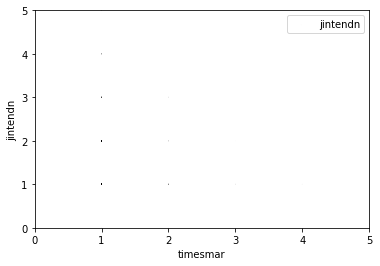

In [88]:
# Scatterplot
thinkplot.Scatter(timesmar, jintendn, alpha=0.01, s=2, color='black')
thinkplot.Config(xlabel='timesmar', ylabel='jintendn', axis=[0, 5, 0, 5])

In [42]:
cleaned = resp.dropna(subset=['timesmar', 'jintendn'])

In [85]:
bins = np.arange(1, 100, 1)
print(bins)
indices = np.digitize(cleaned.timesmar, bins)
print(indices)
groups = cleaned.groupby(indices)
print(groups)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99]
[1 1 2 ... 1 1 2]


In [86]:
for i, group in groups:
    print(i, len(group))

1 992
2 73
3 7
4 2


In [46]:
mean_timesmar = [group.timesmar.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.jintendn) for i, group in groups]
mean_timesmar

[1.0, 2.0, 3.0, 4.0]

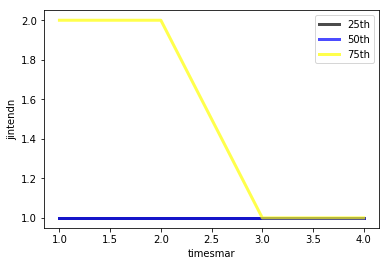

In [87]:
CustomColors = ["black", "blue", "yellow"]
percent = [25, 50, 75]
for i in range(len(percent)):
    jintendn_percentiles = [cdf.Percentile(percent[i]) for cdf in cdfs]
    label = '%dth' % percent[i]
    thinkplot.Plot(mean_timesmar, jintendn_percentiles, label=label,color=CustomColors[i])
    
thinkplot.Config(xlabel='timesmar', ylabel='jintendn', legend=True)

In [58]:
scipy.stats.pearsonr(timesmar_dropna, jintendn_dropna)
# Pearson correlation

ValueError: operands could not be broadcast together with shapes (4126,) (1408,) 

In [65]:
scipy.stats.spearmanr(timesmar_dropna, jintendn_dropna)
# Spearman correlation

ValueError: all the input array dimensions except for the concatenation axis must match exactly

## Spearman correlation is calculated based on ranks while pearson correlation is calculated based on actual values. Pearson assumes linearity and depicts linear relationships while spearman depicts monotonic relationships.